In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#reading the dataset
file_path = 'New Bank_loan_data.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the DataFrame
df.head(5)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [3]:
df.describe() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
df.info() #lets see datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

<h3> let's check the null values <h3>

In [5]:
df.isna().sum() 

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [6]:
df.nunique() #uniqye no of values

ID                    5000
Age                     58
Gender                   5
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Home Ownership           3
Personal Loan            3
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
types_loan = df['Personal Loan'].unique()
types_loan

array([0, 1, ' '], dtype=object)

<h3> there's another space char in the target categories <h3>

In [8]:
value_counts = df['Personal Loan'].value_counts()

In [9]:
value_counts

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

In [10]:
value_counts = df['Gender'].value_counts()
value_counts  #we will later merge '-' and '#' into other as theie nums are insignificant

M    1677
F    1607
O      96
-      21
#       3
Name: Gender, dtype: int64

<h3>we will later merge '-' and '#' into other as these nums are insignificant<h3>

In [11]:
value_counts = df['Education'].value_counts()
value_counts 

1    2097
3    1500
2    1403
Name: Education, dtype: int64

In [12]:
education_map = {
    1: "b",
    2: "m",
    3: "a"
}


<h3> let us represent bachelors as 'b', masters as 'm', and advance degree as 'a'<h3>

In [13]:
df['Education'] = df['Education'].replace(education_map)
value_counts = df['Education'].value_counts()
value_counts 

b    2097
a    1500
m    1403
Name: Education, dtype: int64

<h3> lets remove the Personal Loan with space character although it is only one in number <h3>

In [14]:


# Remove rows where the specified column has the value_to_remove
df1 = df[df['Personal Loan'] != ' ']

# Display the DataFrame after removal


In [15]:
value_counts = df1['Personal Loan'].value_counts()
value_counts

0    4520
1     479
Name: Personal Loan, dtype: int64

In [16]:
print("Categories in 'gender' variable:     ",end=" " )
print(df1['Gender'].unique())


Categories in 'gender' variable:      ['M' 'F' 'O' nan '#' '-']


In [17]:
df1['Gender'].count()

3403

In [18]:
df1['Gender'].value_counts()

M    1676
F    1607
O      96
-      21
#       3
Name: Gender, dtype: int64

In [19]:
df1['Gender'].replace({'-': 'O'}, inplace=True)

C:\Users\Dikshyant\AppData\Local\Temp\ipykernel_11120\1844796872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'].replace({'-': 'O'}, inplace=True)


In [20]:
df1['Gender'].replace({'#': 'O'}, inplace=True)

C:\Users\Dikshyant\AppData\Local\Temp\ipykernel_11120\2346215021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender'].replace({'#': 'O'}, inplace=True)


In [21]:
df1['Gender'].value_counts()

M    1676
F    1607
O     120
Name: Gender, dtype: int64

<h3> Now the '-' and '#' have merged as O <h3>

In [22]:
len(df1)

4999

<h3> We have 4999 data rows but there are 3403 rows specified as gender. so we will fill the remaining(4999-(1676+1607+120)) no of rows with the random values of ['M','F','O'] to make even distributions. we do this to avoid biasness <h3>

In [23]:


# Define a list of strings to choose from
gender_choices = ['M', 'F', 'O']

df1['Gender'].value_counts()

M    1676
F    1607
O     120
Name: Gender, dtype: int64

In [24]:
df1.loc[df1['Gender'].isna(), 'Gender'] = [i for i in np.random.choice(['M', 'F', 'O'], df1['Gender'].isna().sum())]

In [25]:
df1['Gender'].value_counts()

M    2238
F    2136
O     625
Name: Gender, dtype: int64

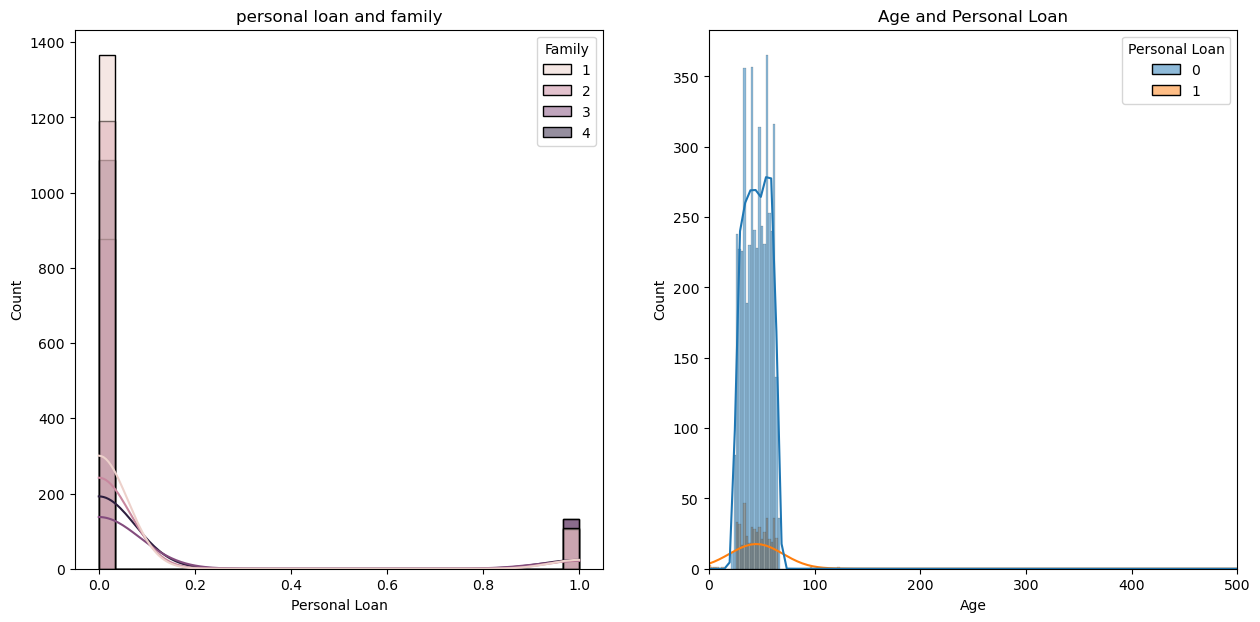

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='Personal Loan',bins=30,kde=True,hue="Family")
plt.title('personal loan and family')
plt.subplot(122)
sns.histplot(data=df1,x='Age',kde=True,hue='Personal Loan')
plt.xlim(0, 500)

plt.title('Age and Personal Loan')
plt.show()    

<h3> We have 6 data rows, ages over 120 here in this dataset this need correction <h3>

In [27]:
count_over_100 = (df1['Age'] > 120).sum()
count_over_100

6

In [28]:
# Calculate the average age excluding ages over 120
average_age = df1[df1['Age'] <= 120]['Age'].mean()

In [29]:
df1.loc[df1['Age'] > 120, 'Age'] = average_age

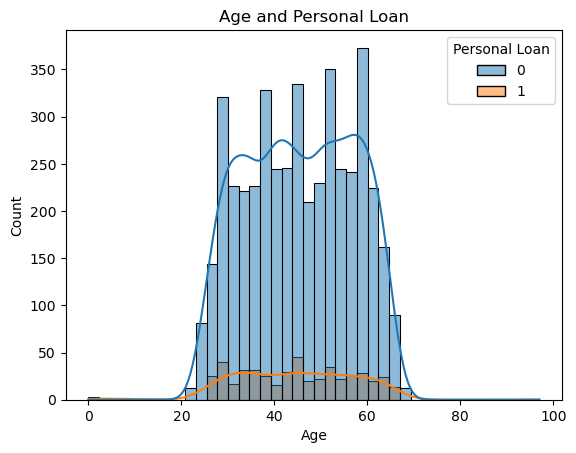

In [30]:
sns.histplot(data=df1,x='Age',kde=True,hue='Personal Loan')

plt.title('Age and Personal Loan')
plt.show() 

<h3>Replace Income nan values by mean value of nan <h3>

In [31]:
# Calculate mean of the 'income' column
income_mean = df1['Income'].mean()

# Fill NaN values in 'income' column with the mean
df1['Income'].fillna(income_mean, inplace=True)

C:\Users\Dikshyant\AppData\Local\Temp\ipykernel_11120\2358773343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Income'].fillna(income_mean, inplace=True)


In [32]:



df1.loc[df1['Home Ownership'].isna(), 'Home Ownership'] = [i for i in np.random.choice(['Home Mortage', 'Rent', 'Home Owner'], df1['Home Ownership'].isna().sum())]

In [33]:

df1['Home Ownership'].value_counts()

Home Mortage    2086
Home Owner      1581
Rent            1332
Name: Home Ownership, dtype: int64

In [34]:
df1.isna().sum() #no more null values in features we need

ID                     0
Age                    0
Gender                 0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Home Ownership         0
Personal Loan          0
Securities Account     0
CD Account             0
Online                40
CreditCard             0
dtype: int64

<h1> Data Analysis <h1>

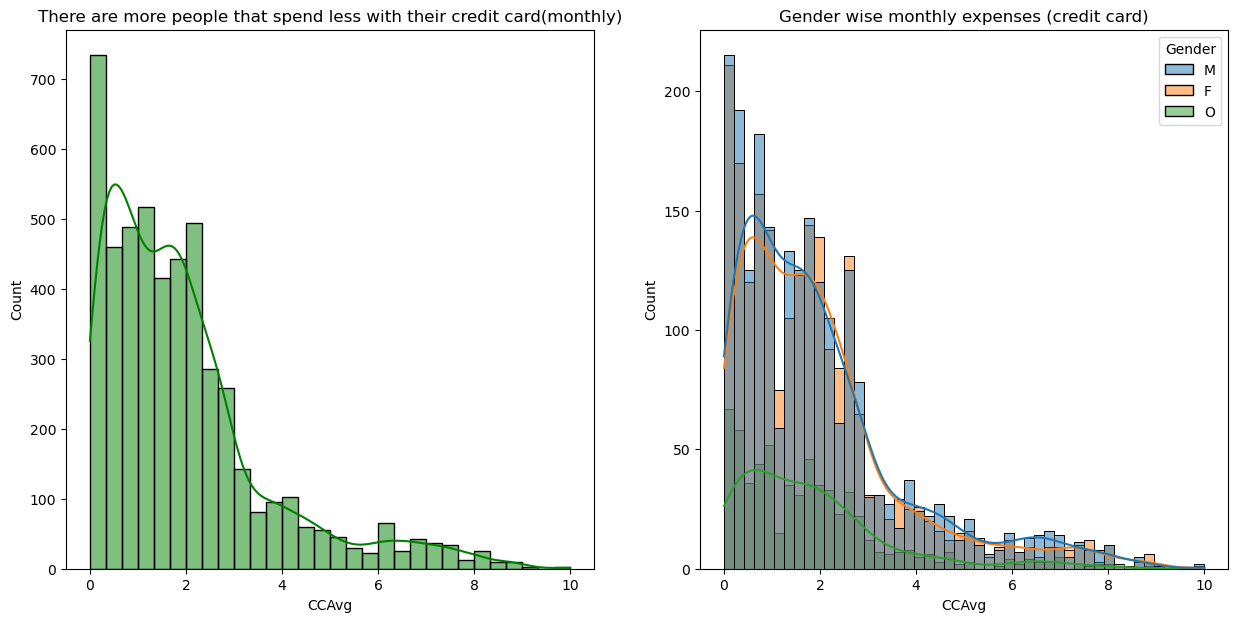

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='CCAvg',bins=30,kde=True,color='g')
plt.title('There are more people that spend less with their credit card(monthly)')
plt.subplot(122)
sns.histplot(data=df1,x='CCAvg',kde=True,hue='Gender')

plt.title('Gender wise monthly expenses (credit card)')
plt.show()    

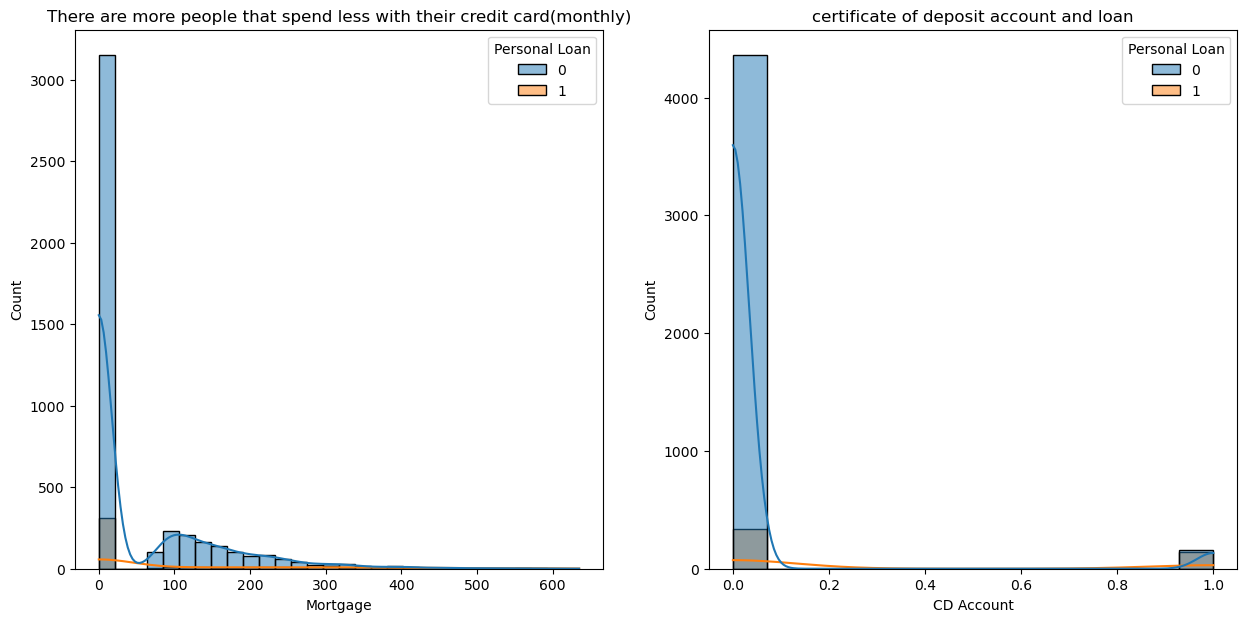

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='Mortgage',bins=30,kde=True,hue="Personal Loan")
plt.title('There are more people that spend less with their credit card(monthly)')
plt.subplot(122)
sns.histplot(data=df1,x='CD Account',kde=True,hue='Personal Loan')

plt.title('certificate of deposit account and loan')
plt.show()    

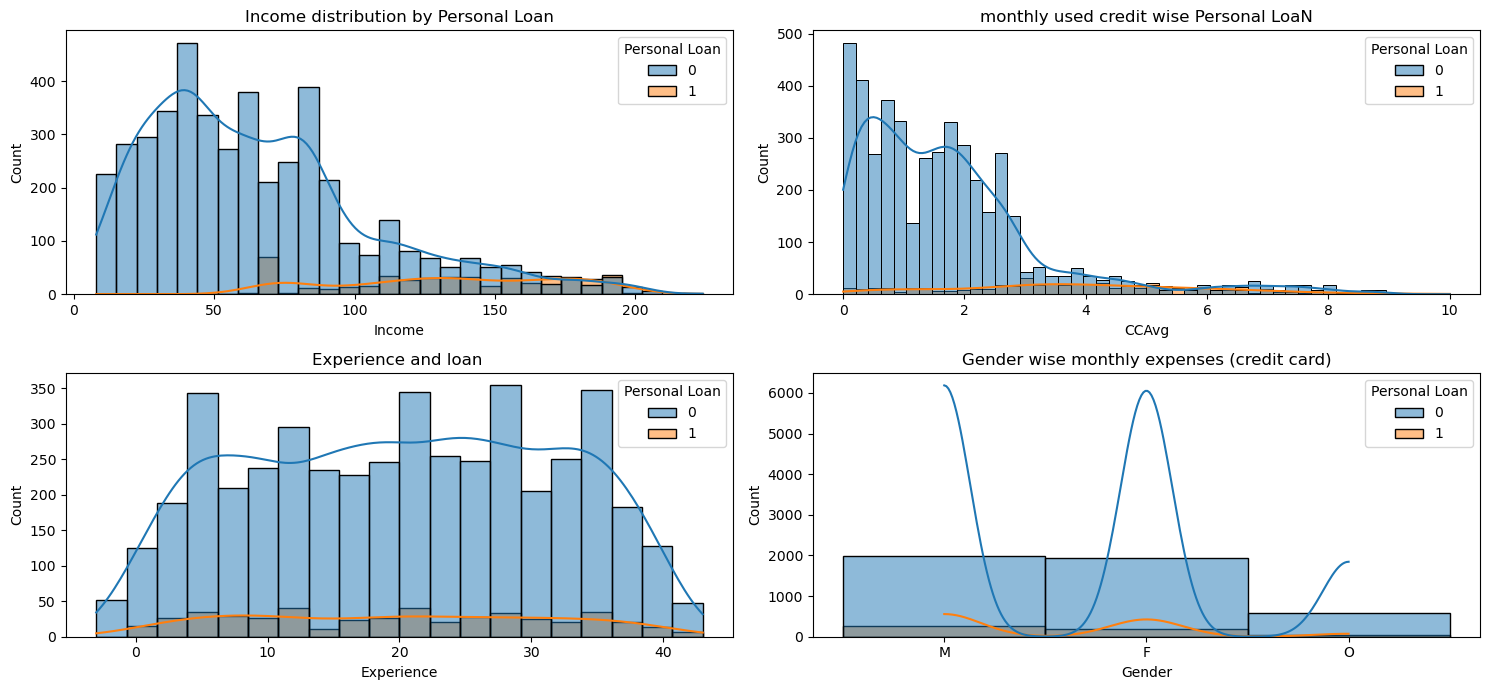

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
# First subplot

sns.histplot(data=df1, x='Income', bins=30, kde=True, hue="Personal Loan", ax=axs[0, 0])
axs[0, 0].set_title('Income distribution by Personal Loan')

# Second subplot
sns.histplot(data=df1, x='CCAvg', kde=True, hue='Personal Loan', ax=axs[0, 1])
axs[0, 1].set_title('monthly used credit wise Personal LoaN')

# Third subplot
sns.histplot(data=df1, x='Experience', kde=True, hue='Personal Loan', ax=axs[1, 0])
axs[1, 0].set_title('Experience and loan ')

# Fourth subplot
sns.histplot(data=df1, x='Gender', kde=True, hue='Personal Loan', ax=axs[1, 1])
axs[1, 1].set_title('Gender wise monthly expenses (credit card)')

plt.tight_layout()
plt.show()

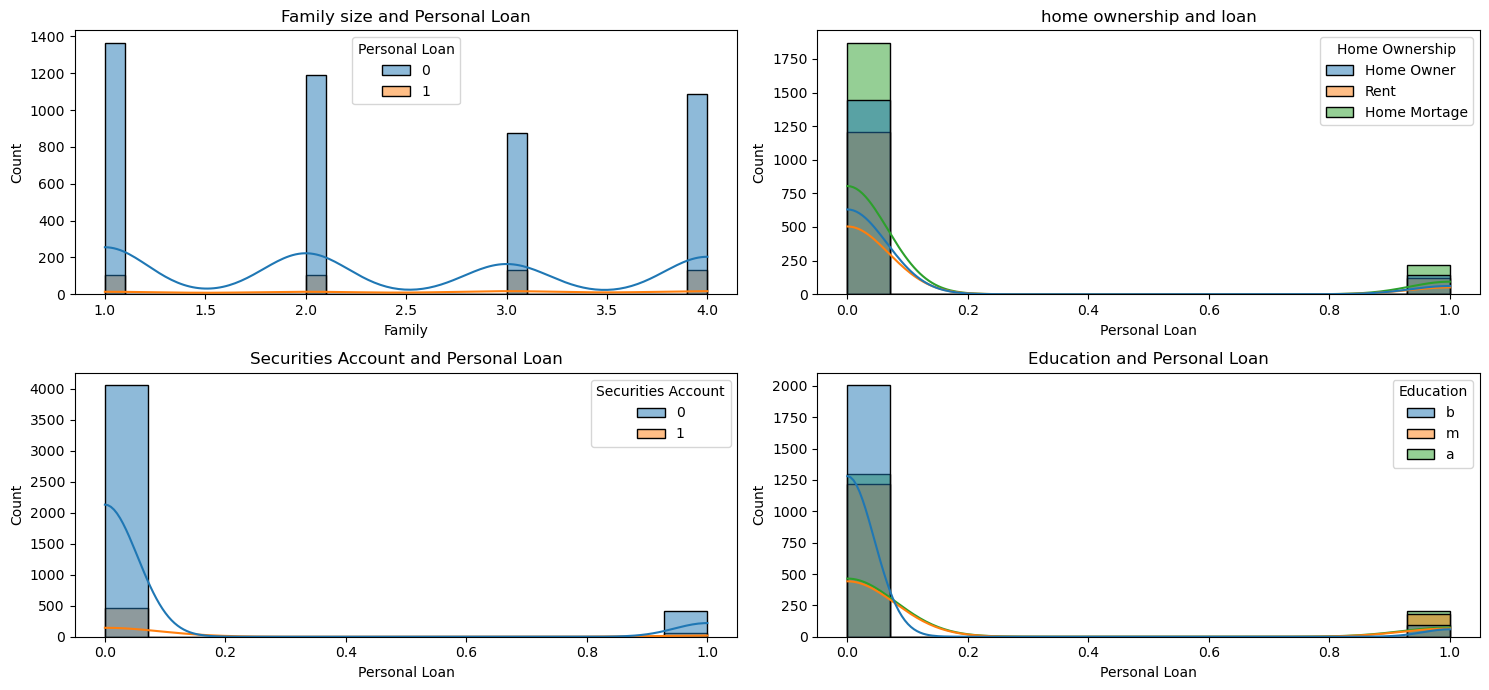

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
# First subplot

sns.histplot(data=df1, x='Family', bins=30, kde=True, hue="Personal Loan", ax=axs[0, 0])
axs[0, 0].set_title('Family size and Personal Loan')

# Second subplot
sns.histplot(data=df1, x='Personal Loan', kde=True, hue='Home Ownership', ax=axs[0, 1])
axs[0, 1].set_title('home ownership and loan')

# Third subplot
sns.histplot(data=df1, x='Personal Loan', kde=True, hue='Securities Account', ax=axs[1, 0])
axs[1, 0].set_title('Securities Account and Personal Loan')

# Fourth subplot
sns.histplot(data=df1, x='Personal Loan', kde=True, hue='Education', ax=axs[1, 1])
axs[1, 1].set_title('Education and Personal Loan')

plt.tight_layout()
plt.show()

In [39]:
df1.drop(columns=['ZIP Code','Securities Account','CD Account','Online','CreditCard'], inplace=True)

C:\Users\Dikshyant\AppData\Local\Temp\ipykernel_11120\812489507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['ZIP Code','Securities Account','CD Account','Online','CreditCard'], inplace=True)


In [40]:
df1

,ID,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan
0,1,25.0,M,1,49.0,4,1.6,b,0,Home Owner,0
1,2,45.0,M,19,34.0,3,1.5,b,0,Rent,0
2,3,39.0,M,15,11.0,1,1.0,b,0,Rent,0
3,4,35.0,M,9,100.0,1,2.7,m,0,Rent,0
4,5,35.0,M,8,45.0,4,1.0,m,0,Rent,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29.0,M,3,40.0,1,1.9,a,0,Rent,0
4996,4997,30.0,O,4,15.0,4,0.4,b,85,Home Mortage,0
4997,4998,63.0,F,39,24.0,2,0.3,a,0,Rent,0
4998,4999,65.0,F,40,49.0,3,0.5,m,0,Home Owner,0


In [41]:
y = df1['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 4999, dtype: object

In [42]:
X = df1.drop(columns=['Personal Loan','ID'],axis=1)
X

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership
0,25.0,M,1,49.0,4,1.6,b,0,Home Owner
1,45.0,M,19,34.0,3,1.5,b,0,Rent
2,39.0,M,15,11.0,1,1.0,b,0,Rent
3,35.0,M,9,100.0,1,2.7,m,0,Rent
4,35.0,M,8,45.0,4,1.0,m,0,Rent
...,...,...,...,...,...,...,...,...,...
4995,29.0,M,3,40.0,1,1.9,a,0,Rent
4996,30.0,O,4,15.0,4,0.4,b,85,Home Mortage
4997,63.0,F,39,24.0,2,0.3,a,0,Rent
4998,65.0,F,40,49.0,3,0.5,m,0,Home Owner


In [43]:
X.shape,y.shape

((4999, 9), (4999,))

In [44]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [45]:
num_features

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], dtype='object')

In [46]:
cat_features

Index(['Gender', 'Education', 'Home Ownership'], dtype='object')

In [47]:
X = preprocessor.fit_transform(X)

In [48]:
X.shape

(4999, 15)

In [49]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3999, 15), (1000, 15))

In [50]:

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import warnings


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)
y_test_binary = label_encoder.transform(y_test)
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),  
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Function to evaluate classification model
def evaluate_classification_model(y_true, y_pred, y_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    
    metrics = [accuracy, precision, recall, f1]
    average_metric = np.mean(metrics)
    
    return accuracy, precision, recall, f1, average_metric

model_list = []
performance_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train_binary)  # Train model with binary labels

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    # Evaluate Train and Test dataset
    train_metrics = evaluate_classification_model(y_train_binary, y_train_pred)
    test_metrics = evaluate_classification_model(y_test_binary, y_test_pred)

    # Print model performance
    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_metrics[0]))
    print("- Precision: {:.4f}".format(train_metrics[1]))
    print("- Recall: {:.4f}".format(train_metrics[2]))
    print("- F1 Score: {:.4f}".format(train_metrics[3]))
    print("- Average Metric: {:.4f}".format(train_metrics[4]))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_metrics[0]))
    print("- Precision: {:.4f}".format(test_metrics[1]))
    print("- Recall: {:.4f}".format(test_metrics[2]))
    print("- F1 Score: {:.4f}".format(test_metrics[3]))
    print("- Average Metric: {:.4f}".format(test_metrics[4]))
        
    performance_list.append(test_metrics)
    
    print('=' * 35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Average Metric: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9740
- Precision: 0.9865
- Recall: 0.7449
- F1 Score: 0.8488
- Average Metric: 0.8886


Logistic Regression
Model performance for Training set
- Accuracy: 0.9515
- Precision: 0.8816
- Recall: 0.5669
- F1 Score: 0.6901
- Average Metric: 0.7725
----------------------------------
Model performance for Test set
- Accuracy: 0.9460
- Precision: 0.9400
- Recall: 0.4796
- F1 Score: 0.6351
- Average Metric: 0.7502


Support Vector Machine
Model performance for Training set
- Accuracy: 0.9767
- Precision: 0.9898
- Recall: 0.7638
- F1 Score: 0.8622
- Average Metric: 0.8981
----------------------------------
Model performance for Test set
- Accuracy: 0.9600
- Precision: 0.9394
- Recall: 0.6327
- F1 Score: 0.7561
- Average Metric: 0.8220


K-Nearest Neighbors
Model performa

In [55]:
last_values = [t[-1] for t in performance_list]

print(last_values)
#this is the avergae value of all accuracy metrics for test dataset

[0.8885554137431213, 0.7501817429674572, 0.8220361403985097, 0.7169125793723379]


In [56]:


df_results = pd.DataFrame(list(zip(model_list,last_values)), 
                          columns=['Model Name', 'Average Metric Value'])


df_results = df_results.sort_values(by='Average Metric Value', ascending=False)


print(df_results)

               Model Name  Average Metric Value
0           Random Forest              0.888555
2  Support Vector Machine              0.822036
1     Logistic Regression              0.750182
3     K-Nearest Neighbors              0.716913


In [57]:
df_results

,Model Name,Average Metric Value
0,Random Forest,0.888555
2,Support Vector Machine,0.822036
1,Logistic Regression,0.750182
3,K-Nearest Neighbors,0.716913


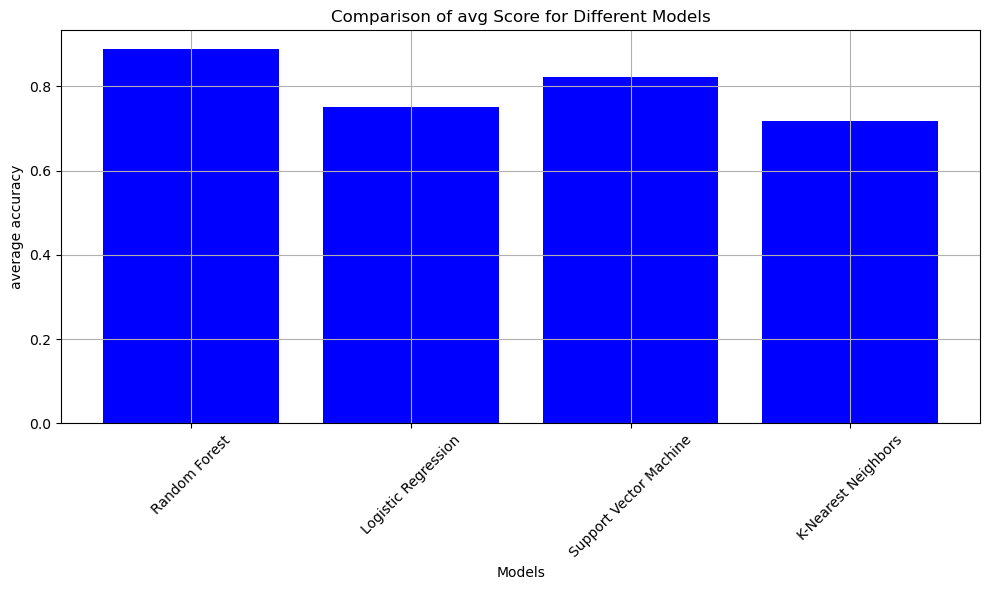

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(model_list, last_values, color='blue')
plt.xlabel('Models')
plt.ylabel('average accuracy')
plt.title('Comparison of avg Score for Different Models')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np



label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)
y_test_binary = label_encoder.transform(y_test)
average_=[]
# Update the models dictionary with classification models
models = {
    "Random Forest": RandomForestClassifier()
    # "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(probability=True),  # Enable probability estimates for ROC AUC
    # "Naive Bayes": GaussianNB(),
    # "K-Nearest Neighbors": KNeighborsClassifier()
}


def evaluate_classification_model(y_true, y_pred, y_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    
    metrics = [accuracy, precision, recall, f1]
    average_metric = np.mean(metrics)
    average_.append(average_metric)
    
    return accuracy, precision, recall, f1, average_metric

model_list = []
performance_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train_binary)  # Train model with binary labels


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    train_metrics = evaluate_classification_model(y_train_binary, y_train_pred)
    test_metrics = evaluate_classification_model(y_test_binary, y_test_pred)

    #  model performance
    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_metrics[0]))
    print("- Precision: {:.4f}".format(train_metrics[1]))
    print("- Recall: {:.4f}".format(train_metrics[2]))
    print("- F1 Score: {:.4f}".format(train_metrics[3]))
    print("- Average Metric: {:.4f}".format(train_metrics[4]))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_metrics[0]))
    print("- Precision: {:.4f}".format(test_metrics[1]))
    print("- Recall: {:.4f}".format(test_metrics[2]))
    print("- F1 Score: {:.4f}".format(test_metrics[3]))
    print("- Average Metric: {:.4f}".format(test_metrics[4]))
        
    performance_list.append(test_metrics)
    
    print('=' * 35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Average Metric: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9740
- Precision: 0.9737
- Recall: 0.7551
- F1 Score: 0.8506
- Average Metric: 0.8883




<Figure size 800x600 with 0 Axes>

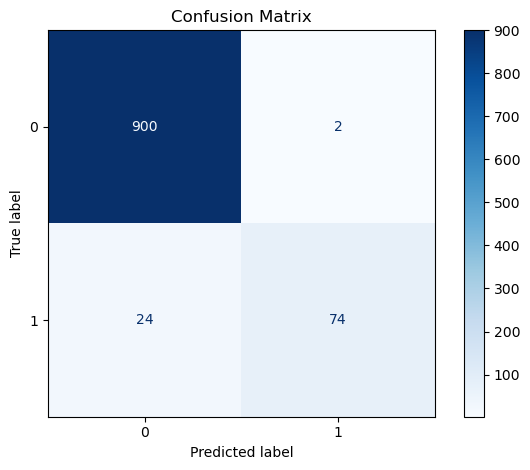

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



y_pred = model.predict(X_test)


cm = confusion_matrix(y_test_binary, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot 
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()


In [61]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df[:10]

,Actual Value,Predicted Value
85,0,0
2471,0,0
2805,1,1
4988,0,0
4925,0,0
4722,0,0
158,0,0
706,0,0
4663,0,0
1182,0,0


In [62]:
df1.rename(columns={'Home Ownership': 'HomeOwnership'}, inplace=True)

C:\Users\Dikshyant\AppData\Local\Temp\ipykernel_11120\3770316458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Home Ownership': 'HomeOwnership'}, inplace=True)


In [63]:
df1

,ID,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,HomeOwnership,Personal Loan
0,1,25.0,M,1,49.0,4,1.6,b,0,Home Owner,0
1,2,45.0,M,19,34.0,3,1.5,b,0,Rent,0
2,3,39.0,M,15,11.0,1,1.0,b,0,Rent,0
3,4,35.0,M,9,100.0,1,2.7,m,0,Rent,0
4,5,35.0,M,8,45.0,4,1.0,m,0,Rent,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29.0,M,3,40.0,1,1.9,a,0,Rent,0
4996,4997,30.0,O,4,15.0,4,0.4,b,85,Home Mortage,0
4997,4998,63.0,F,39,24.0,2,0.3,a,0,Rent,0
4998,4999,65.0,F,40,49.0,3,0.5,m,0,Home Owner,0


In [64]:
df1.to_csv('data.csv', index=False)